In [15]:
# Imports Packages
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset
np.random.seed(1)

In [16]:
X, Y = load_planar_dataset()
#X, Y = load_planar_dataset_2()

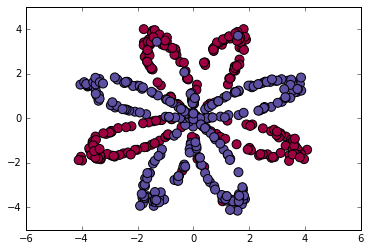

In [17]:
# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y, s=80, cmap=plt.cm.Spectral)

In [18]:
### The shape of input samples and their labels ### 
shape_X = X.shape
shape_Y = Y.shape
m = Y.shape[1]  # training set size

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('Size of training samples is = %d' % (m))

The shape of X is: (2, 500)
The shape of Y is: (1, 500)
Size of training samples is = 500


In [19]:
'''
Define the number of input nodes, the number of nodes in the hidden layer and the number of nodes in the output layer 
'''
def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    
    # We are defining a (2,4,1) architecture.
    n_x = X.shape[0] # size of input layer
    n_h = 4          # size of input layer  
    n_y = Y.shape[0] # size of output layer
    
    return (n_x, n_h, n_y)

In [20]:
'''
Parameter Initialization
We will have 2 weight matrices and 2 bias vectors. Their dimension depends on the inputs and the architecture of the network. 
W1 = (HiddenLayerSize, InputSize)   = (3,4)
W2 = (OutputSize, HiddenLayerSize)  = (1,4)
b1 = (HiddenLayerSize, 1)           = (4,1) 
b2 = (OutputSize, 1)                = (1,1)
'''

def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(2) # we set up a seed so that your output matches ours although the initialization is random.
    
    # Initialized weights from random numbers and bias from zero 
    W1 = np.random.randn(n_h,n_x) * 0.01 
    b1 = np.zeros([n_h,1])
    W2 = np.random.randn(1,n_h) *0.01
    b2 = np.zeros([n_y,1])   
    
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [21]:
#Initial values of the parameters
parameters = initialize_parameters(2, 4, 1)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[ 0.]]


In [22]:
'''
Network Training
Step 1: Calculate the output based given network parameters
Forward_propagation
'''
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    m -- size of training set.
    
    Returns:
    A2 --    The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2", We need these values to calculate the partial derivation of the 
    loss function w.r.t to the parameters. Mainly, we will use them in the chain rule. 
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    # Tangent hyberbolic function is used as the non-linear activation function for the hidden layer. And a sigmoid activation
    # is used for the output layer. 
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [23]:
'''
Network Training
Step 2: Compute the loss/cost
Based on the forward_propagation, calculate the loss. Cross entropy cost is used for this example. 
'''

def compute_cost(A2, Y, parameters):
    """
    Computes the cross-entropy cost 
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    
    Returns:
    cost -- cross-entropy cost over the entire training set
    """
    
    m = Y.shape[1] # number of training samples

    # Compute the cross-entropy cost
    logprobs = np.multiply(np.log(A2),Y) + np.multiply(np.log(1-A2),1-Y)
    cost = - (1/m) * np.sum(logprobs)
    
    cost = np.squeeze(cost)     # makes sure cost is the dimension we expect. 
                                # E.g., turns [[17]] into 17 
    assert(isinstance(cost, float))
    return cost

In [24]:
'''
Network Training
Step 3: backward_propagation
Based on the computed loss/cost, calculate the gradient of the loss function w.r.t to the parameters. 
'''


def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1] #Size of training set
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    W1 = parameters['W1']
    W2 = parameters['W2']
        
    # Retrieve also A1 and A2 from dictionary "cache".
    A1 = cache['A1']
    A2 = cache['A2']
    
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    #These update equations can be derived using chain rule. 
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis = 1, keepdims= True)
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))   
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis = 1 ,keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [25]:
'''
Network Training
Step 3:
Based on the computed gradients, update the paramenters using gradient decent 
'''

def update_parameters(parameters, grads, learning_rate = 1.2):
    """
    Updates parameters using the gradient descent update rule 
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    # Update rule for each parameter
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [26]:
#Main function for building the Neural Network Model. 
# The size of input and output will be taken from the input and output data. However, the number of nodes in the hidden layer
#needs to be defined. 

def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0] #First returned value
    n_y = layer_sizes(X, Y)[2] #Third returned value
    
    # Initialize parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):
         
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)  
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y, parameters) 
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y) 
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads)
        
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [27]:
# Testing the Neural network through Predict function.

def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5) 
    
    return predictions

Cost after iteration 0: 0.693023
Cost after iteration 1000: 0.217972
Cost after iteration 2000: 0.211460
Cost after iteration 3000: 0.208631
Cost after iteration 4000: 0.206893
Cost after iteration 5000: 0.205608
Cost after iteration 6000: 0.204570
Cost after iteration 7000: 0.203698
Cost after iteration 8000: 0.202941
Cost after iteration 9000: 0.202261


c:\cleanenv\cybertron\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
c:\cleanenv\cybertron\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


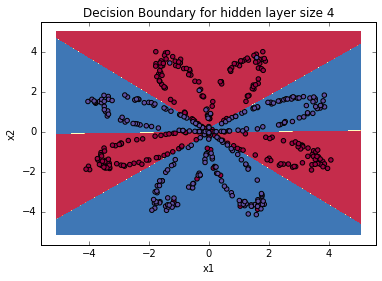

In [28]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

In [29]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 93%


c:\cleanenv\cybertron\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
c:\cleanenv\cybertron\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


Accuracy for 1 hidden units: 69.0 %
Accuracy for 2 hidden units: 68.2 %
Accuracy for 3 hidden units: 91.8 %
Accuracy for 4 hidden units: 91.8 %
Accuracy for 5 hidden units: 92.0 %
Accuracy for 20 hidden units: 93.4 %
Accuracy for 50 hidden units: 93.0 %
Accuracy for 100 hidden units: 92.80000000000001 %


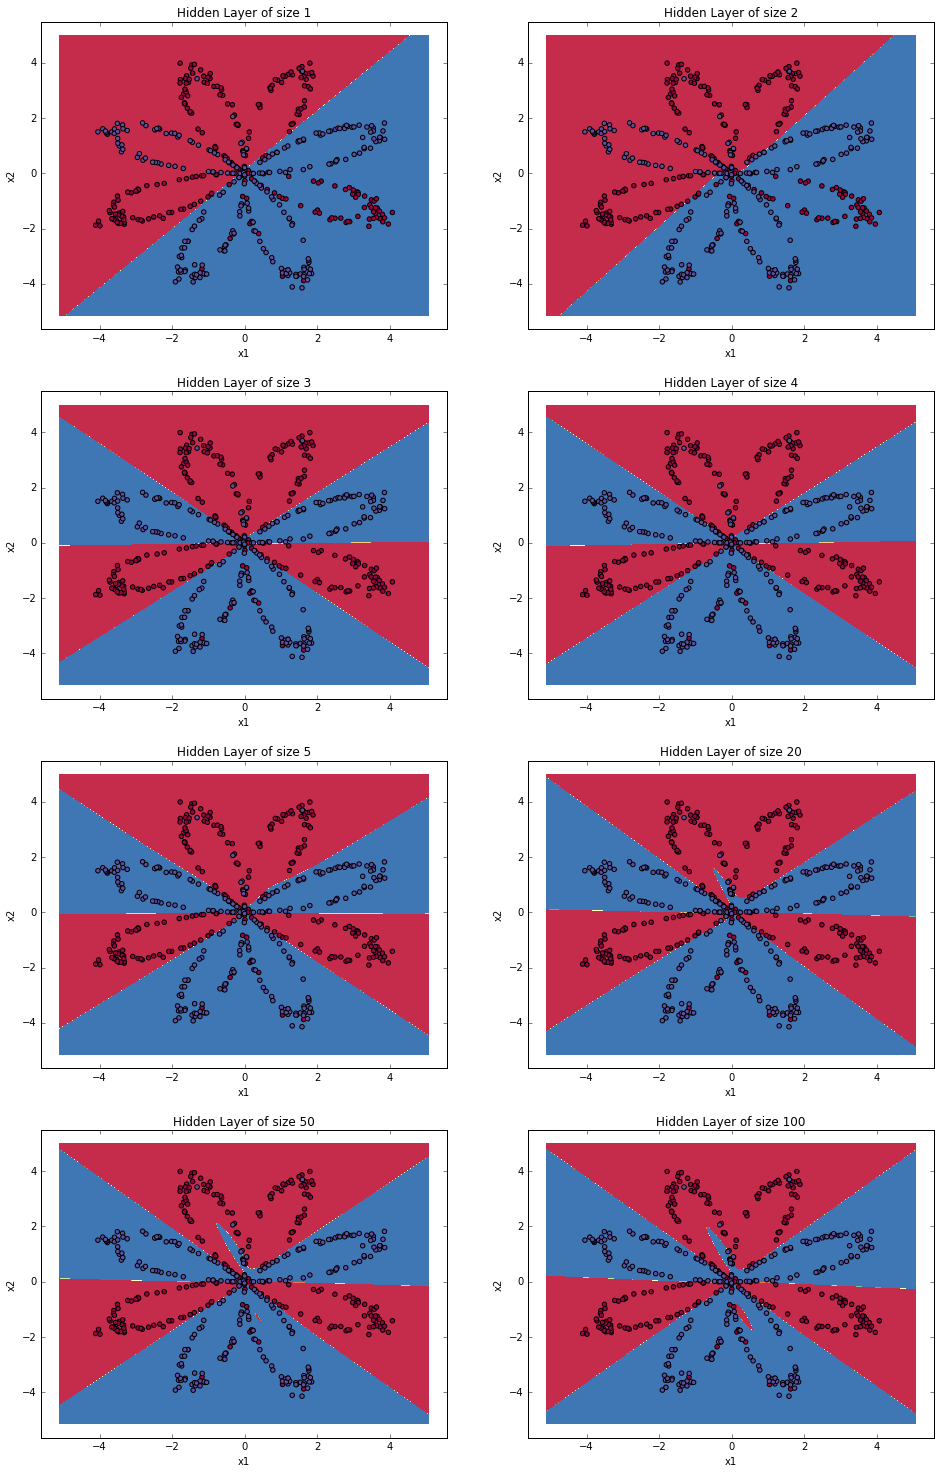

In [30]:
# Testing different configuration of the network for the given data. 

plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50, 100]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))